# Category Comparison

You have a dataset from a new client. Each row represents a production batch. Each column is a "property" or "feature" of that production batch. You are interested in analyzing the target variable `out_speed`. In particular, you want to assess how the batch "properties" influence the `out_speed`.


## Question 1

a. Considering the categorical features, find all the "problematic properties" 
(feature values), if any, that results in a "significant" decrease in `out_speed`. 
How would you assess if a decrease in `out_speed` is "significant" for a particular 
sub-set of batches? 

**Note1:** a subset of batches is a subset of the dataset identified by the 
value of some features. 

**Note2:** do not manually cherry-pick properties, 
implement a search for "problematic properties" instead. 


b. Extend the search to include continuous features.

## Question 2

2. How would you approach finding not a single but a *combination of multiple properties* 
resulting in a decrease in `out_speed`?


# Instructions

For questions 1 and 2, please provide a complete runnable implementation. 
Code and tests should go (as much as possible) in importable Python module(s)
or library. 
The exploratory analysis and results should be presented in a jupyter notebook 
with calls the library functions to perform the computation. 

For question 3, describe the approach you would use. You can provide code examples but you 
don't need to implement a full runnable solution.

Please illustrate your thought process, even mentioning ideas you discarded (if needed). Also, please discuss the assumptions you made
on the data, how did you choose the features 
and what are the trade-offs of your implementation.


1. We want to test your problem solving skills and the ability to structure a solution. The problem description is dry on purpose. Please illustrate your thought process, even mentioning ideas you discarded (if needed). Also, please discuss the assumptions you made
on the data, how did you choose the features 
and what are the trade-offs of your implementation.

1. We greatly value if you can write clear, well-structured python code, possibly with tests to catch or prevent errors. We also encourage you to add descriptions and formatted text to describe what you did.

1. You should use Python 3.6+ plus any additional open source library you deem necessary. Please indicate what additional libraries you used, possibly with instructions for replicating your environment.


# Data

You can find the experimental data in a file [`ds1_cats.csv`](ds1_cats.csv) in the same folder as the notebook.




## Solution 

In [31]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor, cv

### Import the data and show the data

In [32]:
df=pd.read_csv('ds1_cats.csv')
df.head(5)

Unnamed: 0  lordo_speed   out_speed  volume   gaps colb    gr  mano  \
0        2119   209.618428  192.539024  5300.0  112.0    Q  80.0  1.30   
1        2219   199.941153  169.660651  7000.0  112.0    Q  80.0  1.30   
2        2319   188.099007  119.674168  5000.0  760.0    Q  54.0  1.10   
3        2419   167.563051  103.497795  4000.0  160.0    Q  65.0  0.94   
4        2519   192.829584  155.054498  5000.0  640.0    Q  54.0  1.10   

       h1    h2    h3 fr_cu_pm_nb r1_p_b tool  layers ff_cf   sin_st  \
0  1072.0   812   812      Smooth    NaN   T5     4.0    CF  singolo   
1  1072.0  8812  8812      Smooth    NaN   T5     4.0    CF  singolo   
2  1350.0   NaN   NaN      Groove    NaN   T5     4.0    CF  singolo   
3  1350.0   NaN   NaN      Groove    NaN   T5     4.0    CF  singolo   
4  1350.0   NaN   NaN      Groove    NaN   T5     4.0    CF  singolo   

         gr_cat  
0           NaN  
1           NaN  
2   (0.0, 56.0]  
3  (56.0, 66.0]  
4   (0.0, 56.0]

### Using ProfileReport library to explore the data

In [33]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

## Question 1
Find categorial columns from the dataset 

In [34]:
cat_list=df.select_dtypes(include=['object','category']).columns
len(cat_list)

9

As I can see there are 9 categorical features in the dataset. Now I will create a diffierent dataset with only 9 categorical features and the `out_speed`, named `df_cat`

In [35]:
df_cat=df[cat_list]
df_cat['out_speed']=df['out_speed']
df_cat.head(5)

C:\Users\ARNAB\Anaconda3\envs\exercise\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


colb    h2    h3 fr_cu_pm_nb r1_p_b tool ff_cf   sin_st        gr_cat  \
0    Q   812   812      Smooth    NaN   T5    CF  singolo           NaN   
1    Q  8812  8812      Smooth    NaN   T5    CF  singolo           NaN   
2    Q   NaN   NaN      Groove    NaN   T5    CF  singolo   (0.0, 56.0]   
3    Q   NaN   NaN      Groove    NaN   T5    CF  singolo  (56.0, 66.0]   
4    Q   NaN   NaN      Groove    NaN   T5    CF  singolo   (0.0, 56.0]   

    out_speed  
0  192.539024  
1  169.660651  
2  119.674168  
3  103.497795  
4  155.054498

following function find columns with missing values and plot those 

In [36]:
def plot_missing_value(df):
    """
    This fuction takes a dataframe as input and 
    generate a bar plot showing missing values for
    """
    list_of_col=df.columns
    y_1=[]
    u=[]
    y_2=[]
    for l in list_of_col:
        y_1.append(len(df[df[l].isnull()]))
        u.append(len(df[l].unique()))
        y_2.append(len(df)-len(df[df[l].isnull()]))

    y_pos = np.arange(len(list_of_col))
    plt.figure(figsize=(10,5))
    plt.bar(y_pos, y_1, 0.50)
    plt.bar(y_pos, y_2, 0.50,bottom=y_1)
    plt.xticks(y_pos, list_of_col)
    plt.ylabel('number of samples')
    plt.xlabel('columns')
    plt.title('Number of missing values per column')
    for i, v in enumerate(y_1):
        plt.text(y_pos[i] - 0.10, v + 0.10, str(v))
    plt.show()

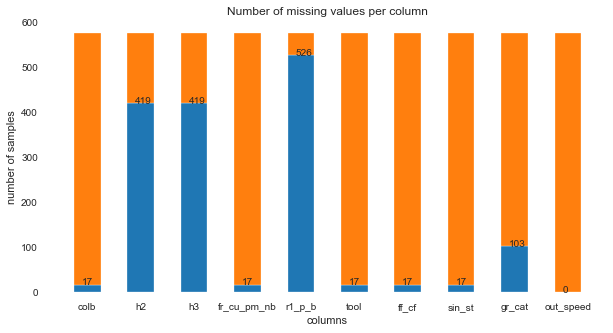

In [37]:
plot_missing_value(df_cat)

As I can see there are some missing values in the dataset. For example `colb`,`fr_cu_pm_nb`,`tool`,`ff_cf`,and `sin_st` has 17 missing values which is very less compared to the total number of samples so I decided to remove 17 rows with missing values.
Now I have decided to remove rows with missing values only for features missing samples are small compare to total number of samples. now I will remove rows where `tool` is missing.

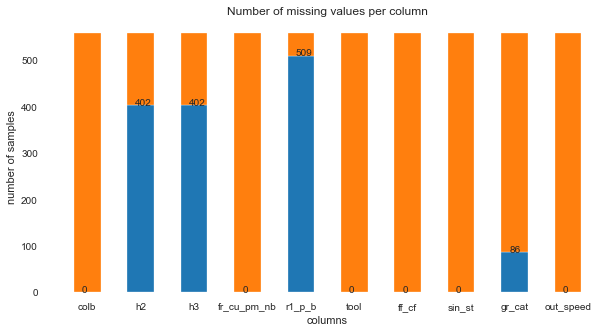

In [38]:
df_cat=df_cat[df_cat['tool'].notna()]
plot_missing_value(df_cat)

from the above chart it's clear that `h2`, `gr_cat` and `h3` has quite a lot of missing values. So I decide to replace those missing values with "unknown". On the other hand I decided to drop `r1_p_b` because of the large number of missing values 

- `bar_char_cat` plot a bar chart for with different values present in the column
- `remove_column` remove a specific column from dataframe
- `replace_missing_with_unknown` replace missing value for a column with "Unknown"

In [39]:
def bar_char_cat(cat,df):
    """
    Create bar chart of column values
    """
    df[cat].value_counts().sort_index().plot.bar()
    
def remove_column(col,df):
    """
    This fuction remove column from dataset
    """
    df=df.drop(col,1)
    return df

def replace_missing_with_unknown(col,df):
    """
    This function replace missing values in column with "Unknown"
    """
    df[col].fillna('unknown', inplace=True)
    return df
    
# bar_char_cat('gr_cat',df_cat)
list_missing_cols=['h2','h3','r1_p_b','gr_cat']

for col in list_missing_cols:
    df_cat=replace_missing_with_unknown(col,df_cat)

In [40]:
df_cat=remove_column('r1_p_b',df_cat)
df_cat=replace_missing_with_unknown('h2',df_cat)

df_cat.head(5)

colb       h2       h3 fr_cu_pm_nb tool ff_cf   sin_st        gr_cat  \
0    Q      812      812      Smooth   T5    CF  singolo       unknown   
1    Q     8812     8812      Smooth   T5    CF  singolo       unknown   
2    Q  unknown  unknown      Groove   T5    CF  singolo   (0.0, 56.0]   
3    Q  unknown  unknown      Groove   T5    CF  singolo  (56.0, 66.0]   
4    Q  unknown  unknown      Groove   T5    CF  singolo   (0.0, 56.0]   

    out_speed  
0  192.539024  
1  169.660651  
2  119.674168  
3  103.497795  
4  155.054498

I have decide to use library `catboost` to create a model to understand relationship between features and `out_speed`. In the question you asked me to find "problematic properties" (feature values) which result in significant decrease in `out_speed` so if I can find the significant feature among all the features then I can also find the specific feature value for which `out_speed` decrease significantly. 

I have decided to use catboost library because it allow to use categorical features for regression and also has function to generate feature importance.

Before doing that I have created feature matrix and labels 

In [41]:
y=df_cat['out_speed']
X=remove_column('out_speed',df_cat)

In [42]:
categorical_features_indices =[0,1,2,3,4,5,6,7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
def perform_model(X_train, y_train,X_test, y_test):
    """
    This function takes training and test set as arguments 
    
    return trained model
    -------------------
    Uses catboostRegressor model 
    """
    model = CatBoostRegressor(
        random_seed = 400,
        loss_function = 'RMSE',
        iterations=100,
    )
    
    model.fit(
        X_train, y_train,
        cat_features = categorical_features_indices,
        eval_set=(X_test, y_test),
        verbose=False
    )
    
    print("RMSE on training data: "+ model.score(X_train, y_train).astype(str))
    print("RMSE on test data: "+ model.score(X_test, y_test).astype(str))
    
    return model

In [44]:
def generate_importance_ranking(model):
    """
    takes trained model and plot a bar chart with feature importance 
    """
    feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

    feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
    
    plt.rcParams["figure.figsize"] = (10,5)
    ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
    ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
    ax.set_xlabel('')

    rects = ax.patches

    labels = feature_score['Score'].round(2)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

    plt.show()

Train and test model of the dataset 

In [45]:
model=perform_model(X_train, y_train,X_test, y_test)

RMSE on training data: 0.10075408977933853
RMSE on test data: 0.27255126512862615


Generate feature importance ranking and ploting them 

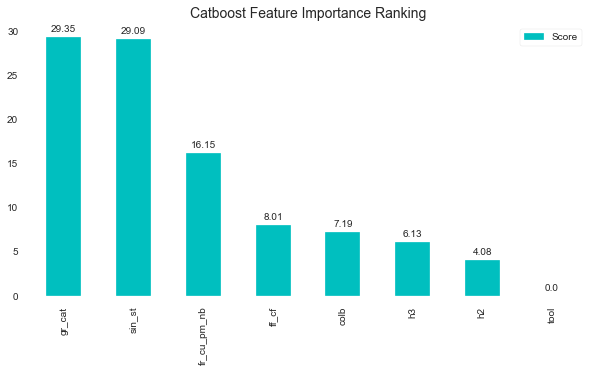

In [46]:
generate_importance_ranking(model)

From the above plot we can see that `gr_cat` is most important feature so I have decided to find mean value for each type of gr_cat value

In [47]:
df_cat[['gr_cat','out_speed']].groupby('gr_cat').mean()

out_speed
gr_cat                  
(0.0, 56.0]   129.886574
(56.0, 66.0]  128.484155
(66.0, 78.0]  151.028213
unknown       143.529752

In [48]:
df_cat[['sin_st','out_speed']].groupby('sin_st').mean()

out_speed
sin_st             
2stecca  177.450042
singolo  135.302561
stecca   107.479414

From the above table we can see that (56.0, 66.0] value significantly effect the `out_speed` to decrease it's value. Also same way I can see that if the `sin_st` is "stecca" then it decrease the `out_speed`

## Question 1/b:

For the second part of the question 1. I have consider also numerical features along with categorical features. So we will go through the same process.

- find the columns with missing values 
- handle the missing values 
- check dataset again

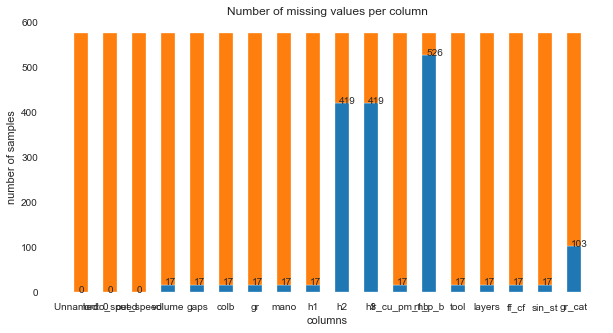

In [49]:
plot_missing_value(df)

In [50]:
list_missing_cols=['h2','h3','r1_p_b','gr_cat']
df_all=df[df['tool'].notna()]

for col in list_missing_cols:
    df_all=replace_missing_with_unknown(col,df_all)

df_all=remove_column('r1_p_b',df_all)


C:\Users\ARNAB\Anaconda3\envs\exercise\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


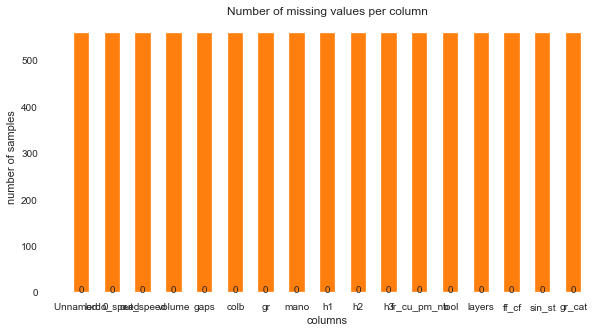

In [51]:
plot_missing_value(df_all)

Now I will create feature matrix and label from the dataset

In [52]:
y=df_all['out_speed']
X=remove_column('out_speed',df_all)
X=remove_column('Unnamed: 0',X)

In [53]:
X.head(5)

lordo_speed  volume   gaps colb    gr  mano      h1       h2       h3  \
0   209.618428  5300.0  112.0    Q  80.0  1.30  1072.0      812      812   
1   199.941153  7000.0  112.0    Q  80.0  1.30  1072.0     8812     8812   
2   188.099007  5000.0  760.0    Q  54.0  1.10  1350.0  unknown  unknown   
3   167.563051  4000.0  160.0    Q  65.0  0.94  1350.0  unknown  unknown   
4   192.829584  5000.0  640.0    Q  54.0  1.10  1350.0  unknown  unknown   

  fr_cu_pm_nb tool  layers ff_cf   sin_st        gr_cat  
0      Smooth   T5     4.0    CF  singolo       unknown  
1      Smooth   T5     4.0    CF  singolo       unknown  
2      Groove   T5     4.0    CF  singolo   (0.0, 56.0]  
3      Groove   T5     4.0    CF  singolo  (56.0, 66.0]  
4      Groove   T5     4.0    CF  singolo   (0.0, 56.0]

In [54]:

categorical_features_indices =[3,7,8,9,10,12,13,14]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now I have trained the model with catbooostRegressor 

In [55]:
model=perform_model(X_train, y_train,X_test, y_test)

RMSE on training data: 0.9503447804832158
RMSE on test data: 0.8839147552845664


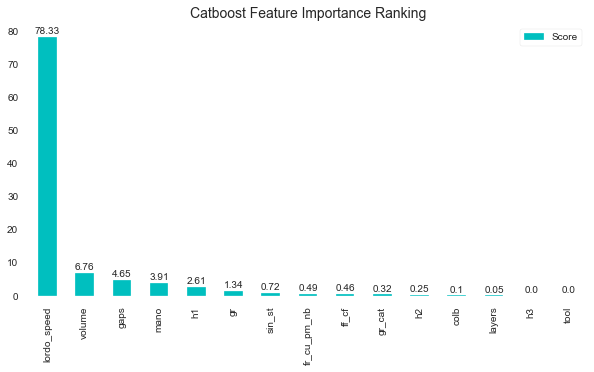

In [56]:
generate_importance_ranking(model)

from the feature importance ranking it's clear that `lordo_speed` has significant influence of `out_speed`

Text(0.5, 1.0, 'Correlation between out_speed and lordo_speed')

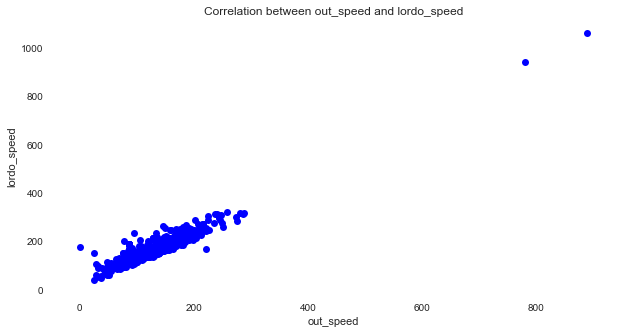

In [57]:
plt.plot(df_all['out_speed'].values,df_all['lordo_speed'].values,'bo')
plt.ylabel('lordo_speed')
plt.xlabel('out_speed')
plt.title('Correlation between out_speed and lordo_speed')

from the above plot we can see that `out_speed` increases with `lordo_speed`

## Question 2:
To find multiple features which resulting in decrease `out_speed`. I can take the most important features. for example I can take top 5 features and analyze them

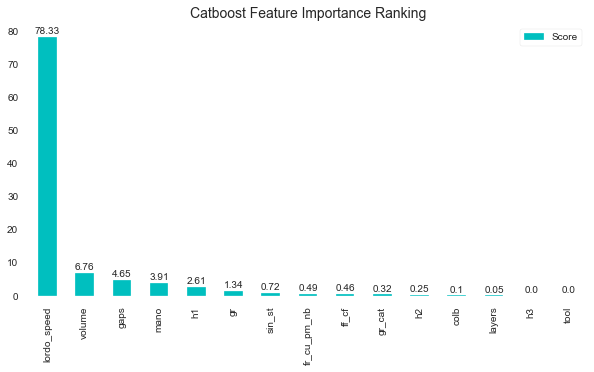

In [58]:
generate_importance_ranking(model)

So top 5 most important features are `lordo_speed`,`volume`,`gaps`,`mano`,and `h1`.

In [59]:
grouped_df=df_all[['lordo_speed','volume','gaps','mano','h1','out_speed']].groupby('out_speed')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

     lordo_speed  volume    gaps  mano      h1  out_speed
441   176.236056  4500.0  1064.0   1.1  1350.0   0.115079 


     lordo_speed  volume   gaps  mano      h1  out_speed
444   151.710708  1000.0  880.0   1.1  1350.0  25.128164 


     lordo_speed  volume  gaps  mano     h1  out_speed
172     39.52954  6000.0  96.0  1.24  800.0  25.884328 


     lordo_speed   volume  gaps  mano      h1  out_speed
324    59.535306  10000.0  64.0   1.2  1160.0  28.323197 


     lordo_speed  volume  gaps  mano      h1  out_speed
453   103.539652  3000.0  64.0  1.25  1180.0  29.750265 


     lordo_speed  volume   gaps  mano      h1  out_speed
328    97.915337  3000.0  160.0  1.24  1350.0  32.539447 


     lordo_speed  volume   gaps  mano      h1  out_speed
191    88.021429   800.0  920.0   1.1  1370.0  33.128571 


     lordo_speed  volume   gaps  mano      h1  out_speed
421    51.170198  3200.0  160.0   1.1  1350.0  34.480481 


     lordo_speed  volume  gaps  mano      h1  out_speed
409     46.0

77   126.248689  1500.0  880.0   1.1  1370.0  94.295089 


    lordo_speed  volume   gaps  mano      h1  out_speed
30     159.8194  2000.0  680.0  0.94  1350.0  94.403073 


     lordo_speed  volume   gaps  mano      h1  out_speed
112   127.055534  1700.0  840.0  0.92  1300.0  94.572338 


     lordo_speed  volume   gaps  mano      h1  out_speed
466   123.744418  2000.0  680.0  0.94  1350.0  94.672491 


     lordo_speed   volume  gaps  mano      h1  out_speed
330   235.438253  22600.0  80.0  1.25  1350.0  94.695783 


     lordo_speed  volume    gaps  mano      h1  out_speed
424   112.090993  2000.0  1088.0   1.1  1350.0  95.111021 


     lordo_speed  volume   gaps  mano      h1  out_speed
567   151.653436  5000.0  384.0   1.3  1212.0  95.134832 


     lordo_speed  volume   gaps  mano      h1  out_speed
414   105.785451  6070.0  864.0  1.15  1050.0  95.615592 


     lordo_speed  volume  gaps  mano      h1  out_speed
160   152.567568  2500.0  64.0   1.0  1080.0  95.621622 


     lo

349    173.71875  4000.0  96.0   1.1  1080.0  118.038491 


     lordo_speed  volume   gaps  mano      h1   out_speed
287   152.264368  4000.0  512.0  0.94  1350.0  119.114129 


   lordo_speed  volume   gaps  mano      h1   out_speed
9   154.796179  4000.0  840.0  0.94  1350.0  119.125991 


     lordo_speed  volume   gaps  mano      h1   out_speed
323   198.507318  1500.0  972.0  1.27  1170.0  119.515671 


   lordo_speed  volume   gaps  mano      h1   out_speed
2   188.099007  5000.0  760.0   1.1  1350.0  119.674168 


     lordo_speed  volume   gaps  mano      h1  out_speed
192   133.908046  3300.0  240.0   1.1  1370.0      120.0 


     lordo_speed   volume   gaps  mano      h1   out_speed
125   159.646115  43000.0  128.0  0.93  1080.0  120.081164
126   159.646115  43000.0  128.0  0.93  1080.0  120.081164
127   159.646115  43000.0  128.0  0.93  1080.0  120.081164
128   159.646115  43000.0  128.0  0.93  1080.0  120.081164 


     lordo_speed   volume   gaps  mano      h1  out_speed

362   148.610427  35900.0  112.0   1.3  1112.0  137.553946 


     lordo_speed  volume   gaps  mano      h1   out_speed
232   159.592805  3500.0  680.0   1.0  1370.0  137.596914 


     lordo_speed   volume   gaps  mano      h1   out_speed
299   149.276257  33000.0  120.0  0.94  1350.0  137.639411 


     lordo_speed  volume   gaps  mano      h1  out_speed
240   193.083914  4000.0  864.0   1.3  1372.0  137.69638 


    lordo_speed  volume   gaps  mano      h1   out_speed
45   164.758929  4000.0  144.0  0.94  1350.0  137.850446 


     lordo_speed  volume   gaps  mano      h1  out_speed
563    156.32237  5000.0  720.0  0.94  1350.0  138.23633 


     lordo_speed   volume   gaps  mano      h1   out_speed
249    154.71403  19000.0  800.0   1.1  1350.0  138.365528 


     lordo_speed  volume   gaps  mano      h1   out_speed
114   155.047199  8000.0  128.0  1.25  1080.0  138.390587 


     lordo_speed  volume   gaps  mano      h1   out_speed
355   167.874462  4000.0  800.0  0.94  1350.0  13

35   192.189914  6000.0  840.0  0.94  1350.0  176.758586 


    lordo_speed  volume   gaps  mano      h1  out_speed
93   205.957639  2500.0  216.0  1.27  1170.0     177.35 


     lordo_speed   volume  gaps  mano      h1   out_speed
296   183.632184  14000.0  64.0  0.93  1080.0  177.471264 


    lordo_speed   volume   gaps  mano      h1   out_speed
14   190.951331  29000.0  896.0   1.1  1350.0  178.612098 


   lordo_speed   volume   gaps  mano      h1   out_speed
6   195.629652  12000.0  192.0  1.25  1080.0  179.622753 


     lordo_speed   volume   gaps  mano      h1   out_speed
173    186.47383  31000.0  400.0  1.15  1350.0  180.222882
174    186.47383  31000.0  400.0  1.15  1350.0  180.222882
175    186.47383  31000.0  400.0  1.15  1350.0  180.222882
176    186.47383  31000.0  400.0  1.15  1350.0  180.222882 


     lordo_speed   volume   gaps  mano      h1   out_speed
251   185.958605  19000.0  160.0   1.1  1350.0  180.646423 


     lordo_speed  volume   gaps  mano      h1  out_

199   300.143455  11000.0  400.0  1.27  1350.0  274.233793 


     lordo_speed   volume   gaps  mano      h1   out_speed
431   284.276426  20000.0  160.0  1.25  1350.0  276.281629 


     lordo_speed  volume  gaps  mano      h1   out_speed
547   317.777778  6000.0  80.0  1.25  1350.0  280.622222 


     lordo_speed   volume   gaps  mano      h1   out_speed
553   312.479167  12000.0  112.0   1.1  1350.0  286.383333 


     lordo_speed  volume  gaps  mano      h1   out_speed
549   317.772727  6000.0  80.0  1.25  1350.0  288.795455 


    lordo_speed  volume   gaps  mano      h1   out_speed
94   941.632663  5500.0  800.0  1.05  1350.0  779.989063 


     lordo_speed  volume   gaps  mano      h1   out_speed
493  1062.225036  8000.0  880.0  1.05  1350.0  888.359488 




## Tests 

In [74]:
def test_remove_column():
    df = pd.DataFrame({'numbers': [1, 2, 3], 'colors': ['red', 'white', 'blue']})
    df=remove_column('colors',df)
    assert df.shape[1]==1

In [ ]:
test_remove_column()

In [ ]:
def test_replace_missing_with_unknown():
    df = pd.DataFrame({'numbers': [1, 2, 3], 'colors': [np.NaN, np.NaN, 'blue']})
    df = replace_missing_with_unknown('colors',df)
    assert df.iloc[0].colors=='unknown'

In [ ]:
test_replace_missing_with_unknown()